In [19]:
import pandas as pd

# Load the dataset
file_path = r"C:\Users\Jose Zambom\OneDrive - Exel Industries\Data Analysis\Data Analytics Immersion\Advanced Analytics & Dashboard Design\Cleaned Data\gun-violence-cleaned.csv"
data = pd.read_csv(file_path)

# Display the first few rows to confirm
print(data.head())

   incident_id        date           state city_or_county  \
0       461105  2013-01-01    Pennsylvania     Mckeesport   
1       460726  2013-01-01      California      Hawthorne   
2       478855  2013-01-01            Ohio         Lorain   
3       478925  2013-01-05        Colorado         Aurora   
4       478959  2013-01-07  North Carolina     Greensboro   

                                     address  n_killed  n_injured  \
0  1506 Versailles Avenue and Coursin Street         0          4   
1               13500 block of Cerise Avenue         1          3   
2                      1776 East 28th Street         1          3   
3           16000 block of East Ithaca Place         4          0   
4                  307 Mourning Dove Terrace         2          2   

                                        incident_url  \
0  http://www.gunviolencearchive.org/incident/461105   
1  http://www.gunviolencearchive.org/incident/460726   
2  http://www.gunviolencearchive.org/incident/4788

In [21]:
# Select only numeric columns
numeric_data = data.select_dtypes(include=['number'])

# Calculate the correlation matrix for numeric columns
correlation_matrix = numeric_data.corr()

# Display the correlation matrix
print(correlation_matrix)


                        incident_id  n_killed  n_injured  \
incident_id                1.000000  0.005052   0.009060   
n_killed                   0.005052  1.000000  -0.125425   
n_injured                  0.009060 -0.125425   1.000000   
congressional_district    -0.056252  0.042188  -0.005345   
latitude                   0.024123 -0.076201  -0.011260   
longitude                 -0.011173 -0.058502   0.036337   
n_guns_involved            0.017393 -0.022235  -0.032716   
state_house_district      -0.044059 -0.004116  -0.011589   
state_senate_district     -0.048024 -0.007123  -0.023839   

                        congressional_district  latitude  longitude  \
incident_id                          -0.056252  0.024123  -0.011173   
n_killed                              0.042188 -0.076201  -0.058502   
n_injured                            -0.005345 -0.011260   0.036337   
congressional_district                1.000000 -0.262600  -0.213926   
latitude                             -0.2626

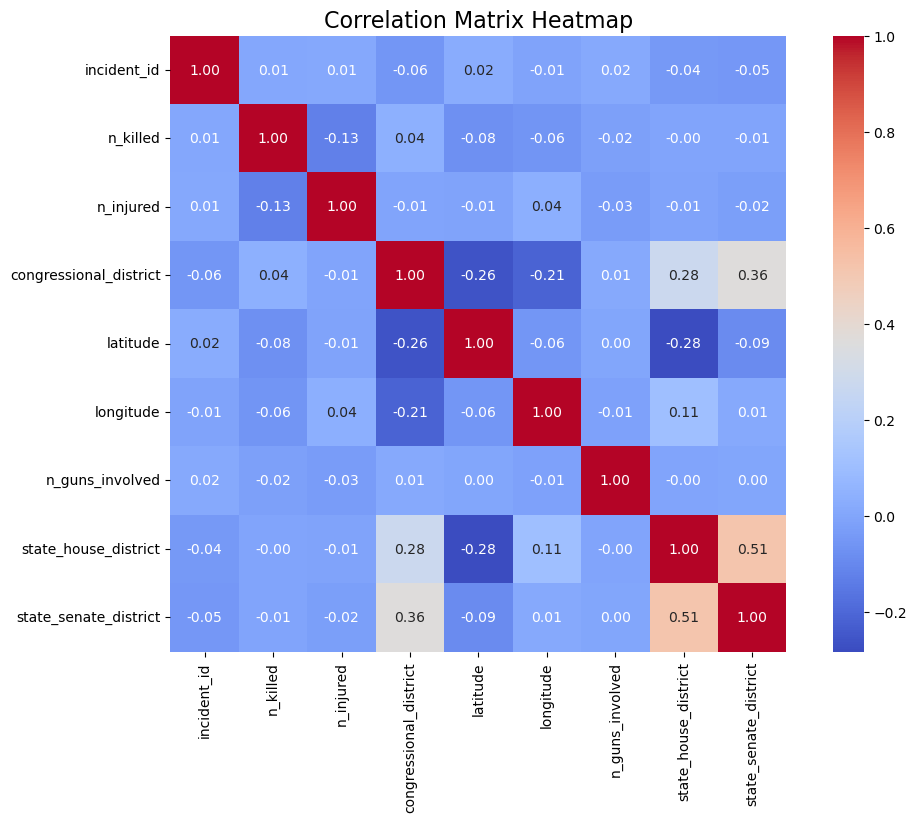

In [22]:
# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True)

# Add a title
plt.title("Correlation Matrix Heatmap", fontsize=16)
plt.show()


In [23]:
# Drop 'incident_id', 'latitude', and 'longitude'
numeric_data = numeric_data.drop(columns=['incident_id', 'latitude', 'longitude'])

# Recalculate the correlation matrix
correlation_matrix = numeric_data.corr()


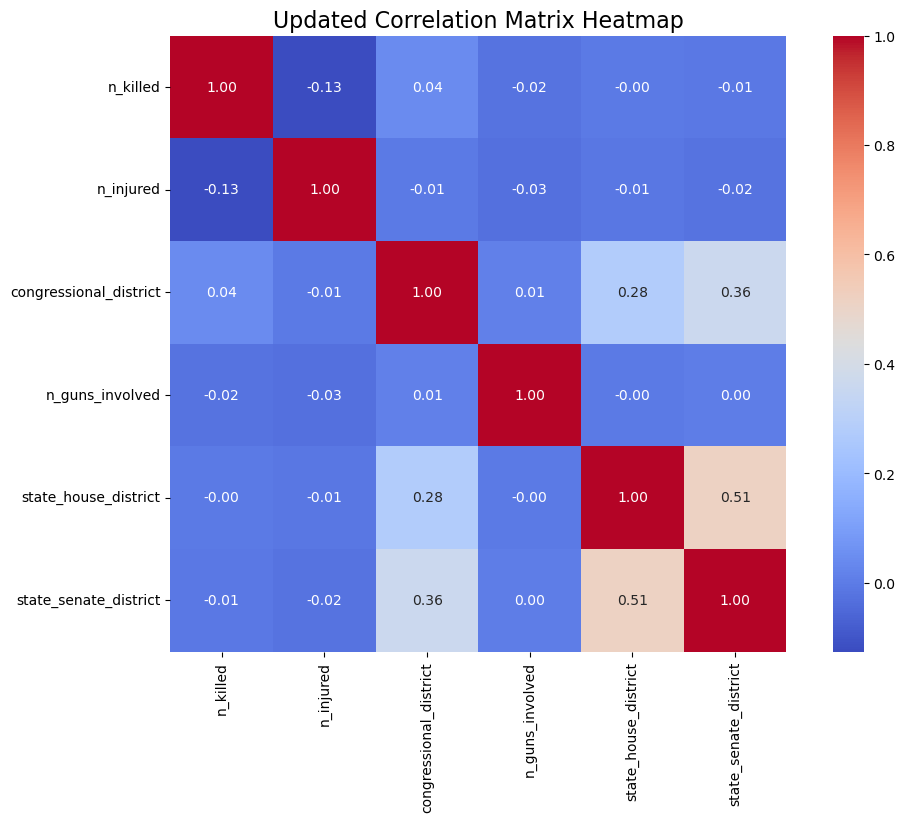

In [24]:
# Plot the heatmap without 'incident_id', 'latitude', and 'longitude'
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True)

# Add a title
plt.title("Updated Correlation Matrix Heatmap", fontsize=16)
plt.show()


## **Correlation Matrix Observations**

### **Key Relationships:**

1. **`n_killed` and `n_injured`**
   - **Correlation**: `-0.13` (weak negative relationship).
   - **Interpretation**: Incidents with more fatalities tend to have fewer injuries, likely due to the severity of the events leading to immediate fatalities rather than survivors with injuries.

2. **`congressional_district` and `state_senate_district`**
   - **Correlation**: `0.36` (moderate positive relationship).
   - **Interpretation**: These variables reflect legislative boundaries and naturally have some alignment due to the way districts are geographically structured.

3. **`state_house_district` and `state_senate_district`**
   - **Correlation**: `0.51` (strong positive relationship).
   - **Interpretation**: These two legislative districts often overlap within states, leading to a stronger correlation.

4. **`n_guns_involved` with Other Variables**
   - **Correlation**: Near `0` with most variables.
   - **Interpretation**: The number of guns involved in an incident does not strongly relate to other variables such as fatalities, injuries, or legislative district information.

---

### **Conclusion**
- The updated correlation matrix highlights weak or moderate relationships among most variables.
- While `n_killed` and `n_injured` show a weak inverse relationship, the legislative district variables (`state_house_district` and `state_senate_district`) exhibit the strongest alignment, reflecting geographical and administrative overlaps.


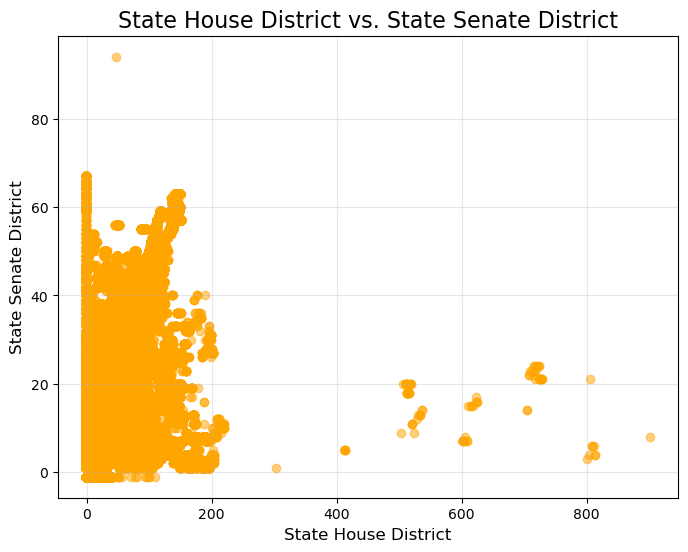

In [25]:
import matplotlib.pyplot as plt

# Scatterplot for state_house_district vs. state_senate_district
plt.figure(figsize=(8, 6))
plt.scatter(data['state_house_district'], data['state_senate_district'], alpha=0.5, color='orange')
plt.title('State House District vs. State Senate District', fontsize=16)
plt.xlabel('State House District', fontsize=12)
plt.ylabel('State Senate District', fontsize=12)
plt.grid(alpha=0.3)
plt.show()


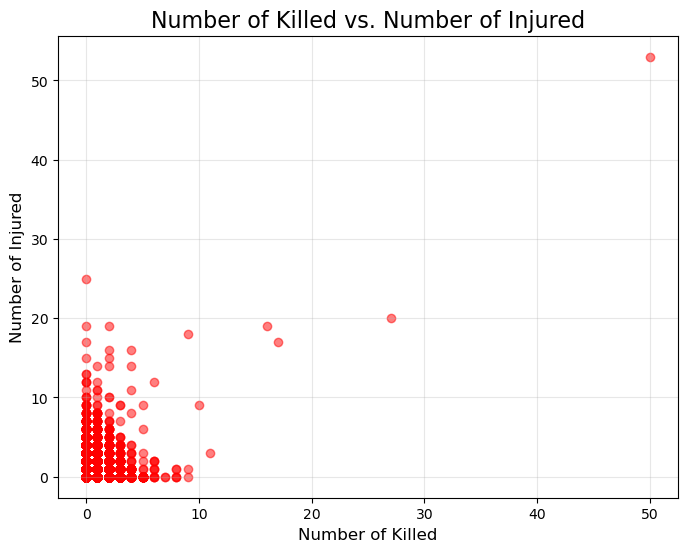

In [26]:
# Scatterplot for n_killed vs. n_injured
plt.figure(figsize=(8, 6))
plt.scatter(data['n_killed'], data['n_injured'], alpha=0.5, color='red')
plt.title('Number of Killed vs. Number of Injured', fontsize=16)
plt.xlabel('Number of Killed', fontsize=12)
plt.ylabel('Number of Injured', fontsize=12)
plt.grid(alpha=0.3)
plt.show()


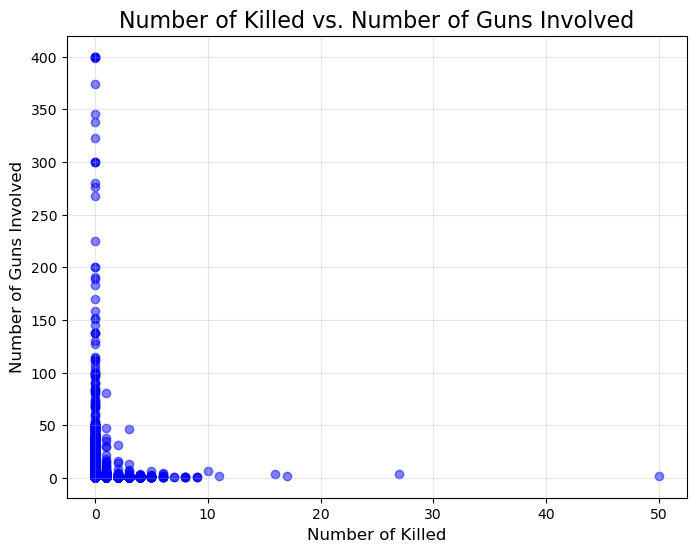

In [27]:
# Scatterplot for n_killed vs. n_guns_involved
plt.figure(figsize=(8, 6))
plt.scatter(data['n_killed'], data['n_guns_involved'], alpha=0.5, color='blue')
plt.title('Number of Killed vs. Number of Guns Involved', fontsize=16)
plt.xlabel('Number of Killed', fontsize=12)
plt.ylabel('Number of Guns Involved', fontsize=12)
plt.grid(alpha=0.3)
plt.show()


## **Scatterplot Analysis**

### **1. Number of Killed vs. Number of Injured**
- **Observation**:
  - The scatterplot shows a clustering of incidents with few fatalities (0–5) and injuries (0–10).
  - A weak negative relationship is visible, aligning with the correlation coefficient of **-0.13**.
  - Incidents with higher fatalities (e.g., 40–50 killed) tend to have fewer injuries, possibly due to the severity of the event leading to immediate fatalities.

- **Outliers**:
  - Some events with exceptionally high injuries but low fatalities could indicate non-lethal mass shootings or other unusual incidents.

---

### **2. Number of Killed vs. Number of Guns Involved**
- **Observation**:
  - The scatterplot shows no clear trend, supporting the near-zero correlation.
  - Most incidents involve fewer than 10 fatalities and fewer than 20 guns.
  - The plot shows outliers with over 400 guns involved and few fatalities, likely representing specific incidents with high gun counts but minimal casualties.

- **Outliers**:
  - Events with high numbers of guns (e.g., >100) and relatively low fatalities stand out as special cases, possibly linked to large-scale gun recoveries or standoffs.

---

### **Conclusion**
- The weak correlations indicate that other factors (e.g., incident characteristics or participant demographics) may play a more significant role in determining the severity of gun violence incidents.
- The scatterplots reinforce the need for additional analysis on non-numerical variables.




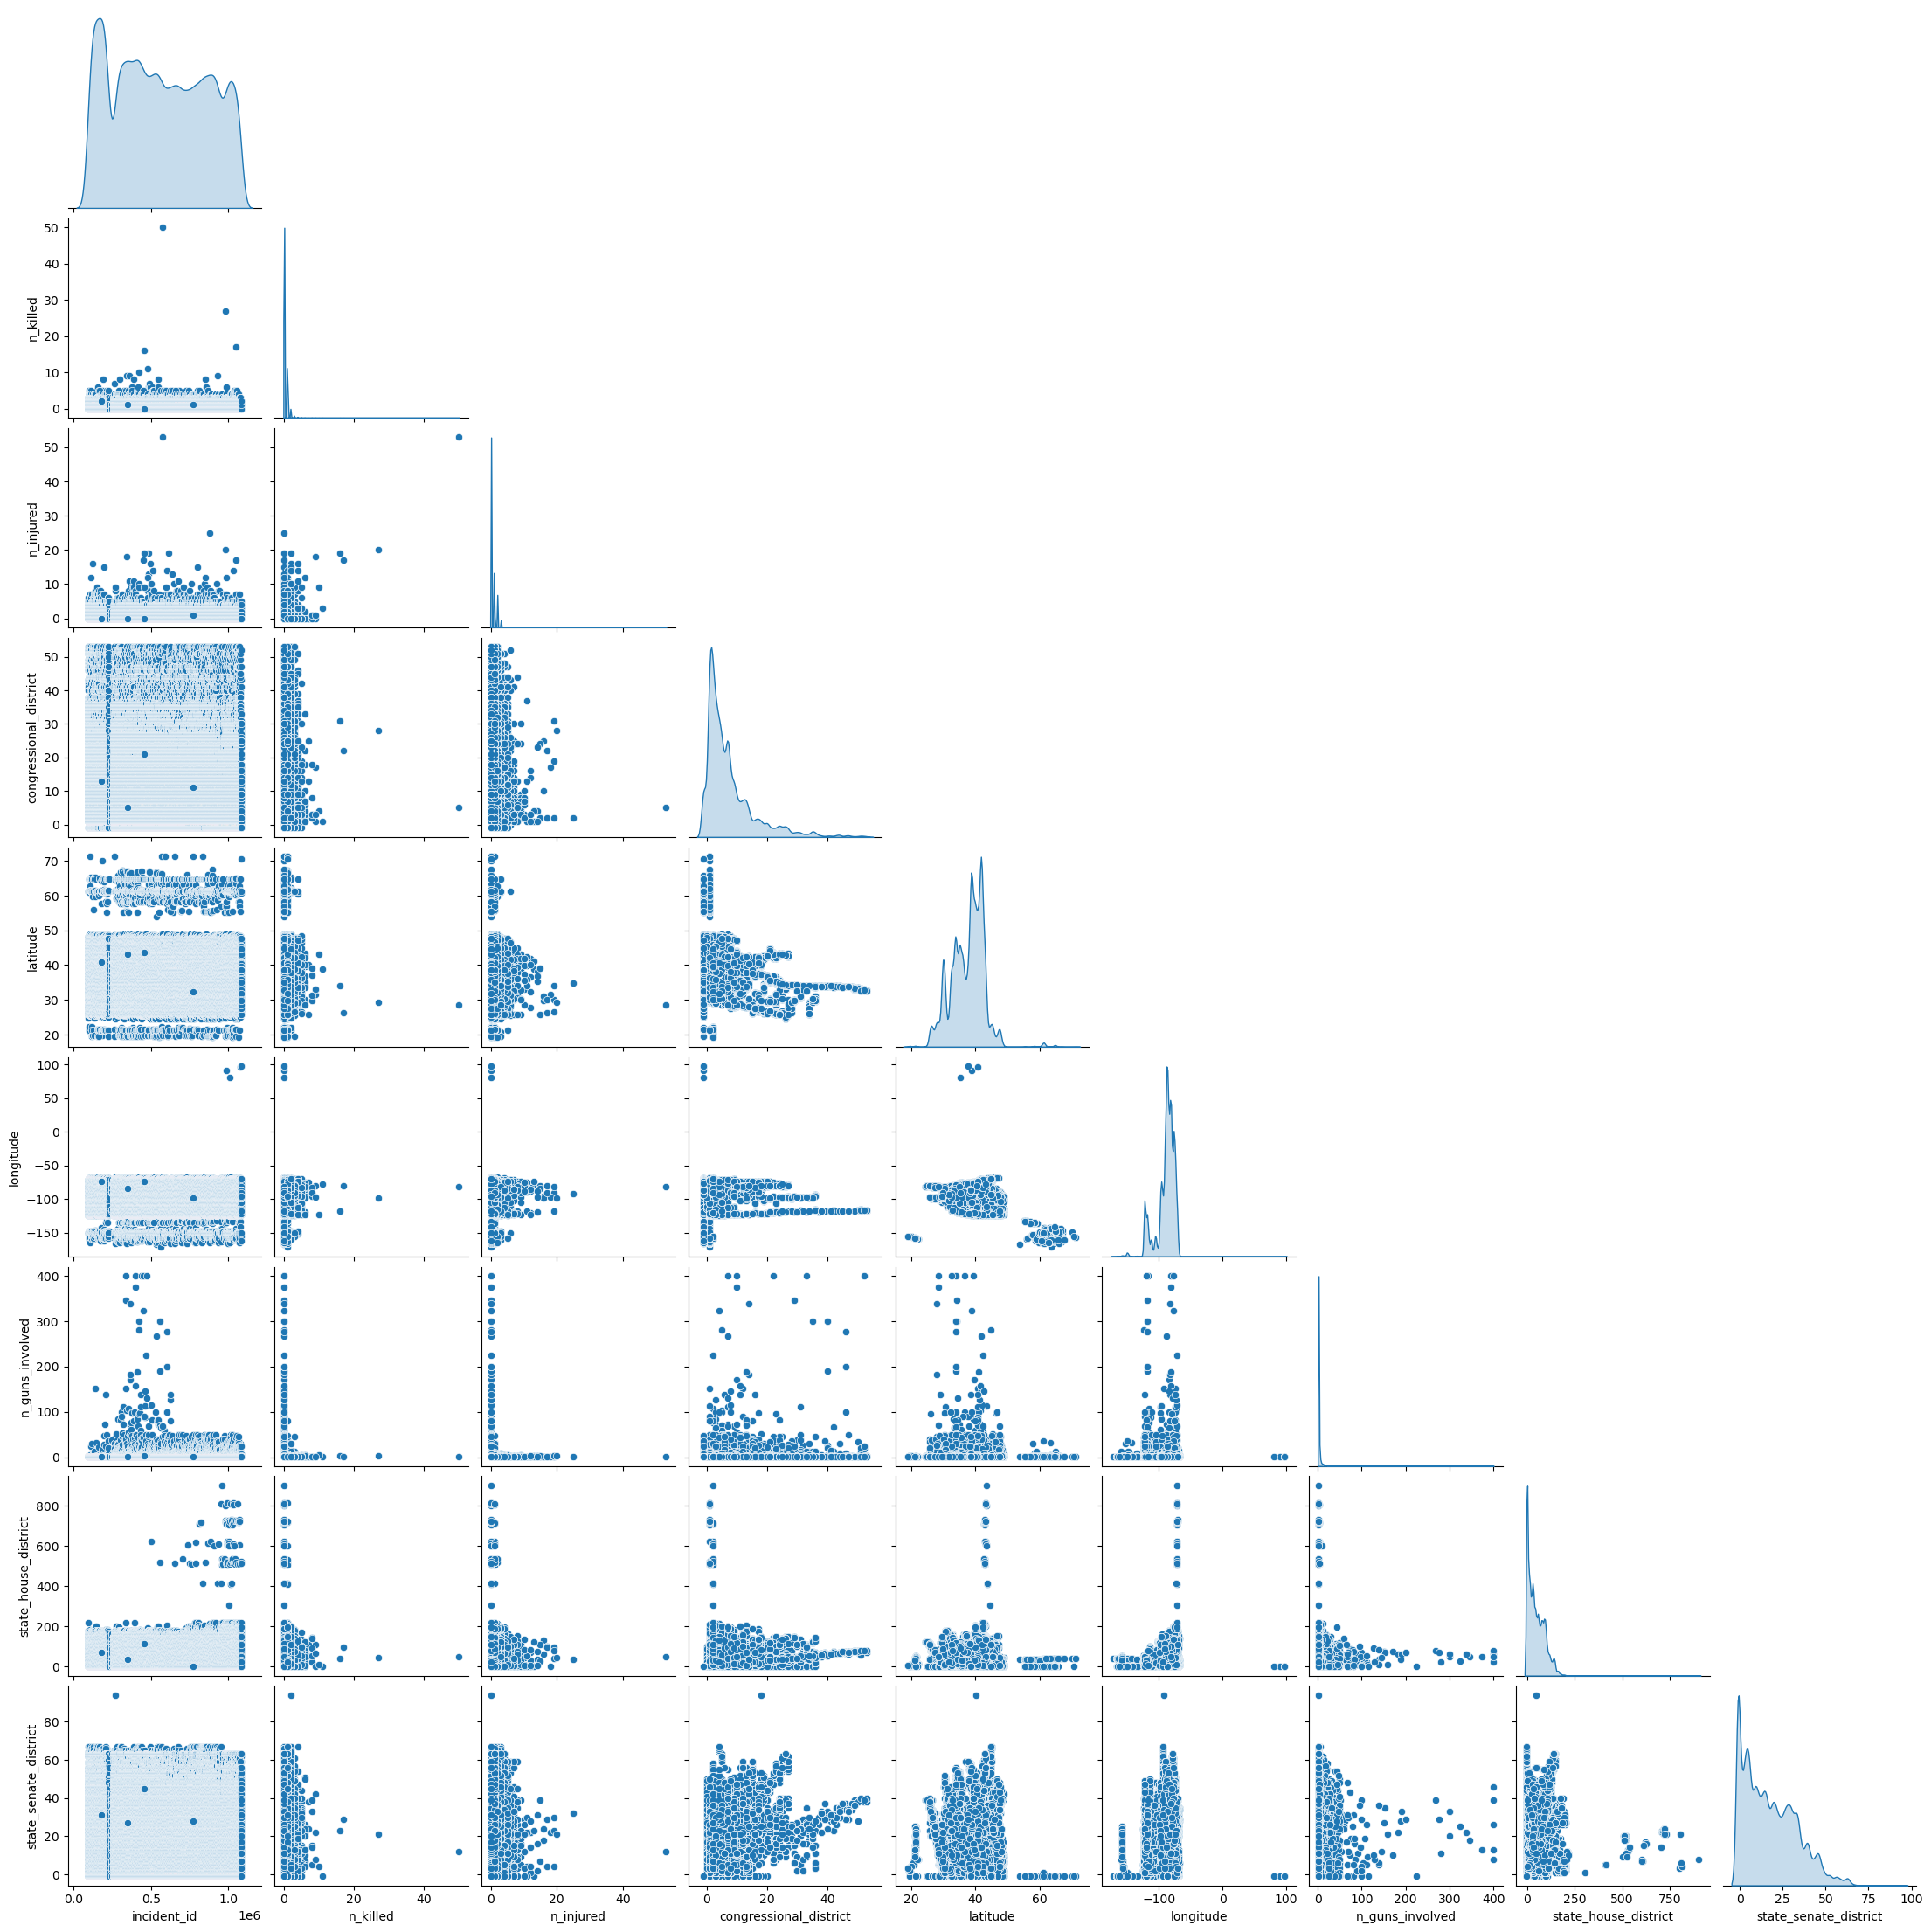

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numerical columns for the pair plot
numerical_columns = data.select_dtypes(include=['number'])

# Create the pair plot
sns.pairplot(numerical_columns, diag_kind='kde', corner=True, height=2.5)

# Show the plot
plt.show()

## **Pair Plot Analysis**

### **Key Observations:**

1. **Distributions**:
   - **`n_killed` and `n_injured`**:
     - Both variables are heavily right-skewed, with most incidents involving 0–5 injuries or fatalities.
     - This skewness indicates that extreme cases (e.g., mass shootings) are rare but impactful.
   - **`n_guns_involved`**:
     - Similar right-skewed distribution, with most incidents involving only a small number of guns.

2. **Relationships**:
   - **`n_killed` vs. `n_injured`**:
     - The scatterplot shows a weak, slightly negative relationship, confirming earlier findings.
   - **`n_killed` and `n_guns_involved`**:
     - Almost no discernible relationship, suggesting that the number of guns involved does not strongly influence fatalities.

3. **Legislative Districts (`state_house_district` and `state_senate_district`)**:
   - These variables exhibit a moderate positive relationship but are not directly related to incident severity.

---

### **Variables to Explore Further:**

1. **`n_killed` and `n_injured`**:
   - **Reason**: These variables are central to understanding the severity of gun violence incidents and their causes.

2. **`n_guns_involved`**:
   - **Reason**: While the number of guns does not correlate strongly with fatalities or injuries, it is important to examine whether specific incident types (e.g., mass shootings) involve more firearms.

3. **Incident Characteristics and Participant Demographics**:
   - **Reason**: Non-numerical variables, such as participant age groups and incident characteristics, may reveal more actionable insights about gun violence patterns.


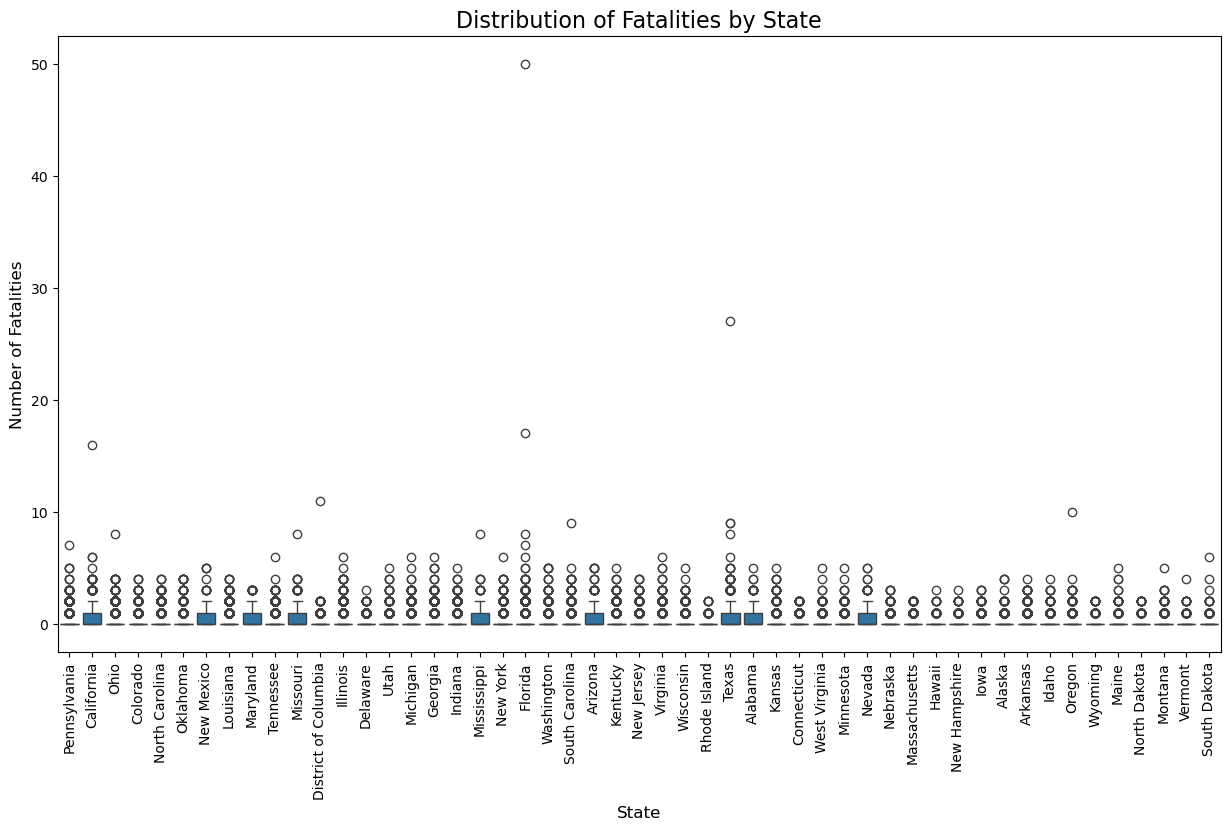

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a boxplot for the number of killed by state
plt.figure(figsize=(15, 8))
sns.boxplot(data=data, x='state', y='n_killed')
plt.xticks(rotation=90)
plt.title('Distribution of Fatalities by State', fontsize=16)
plt.xlabel('State', fontsize=12)
plt.ylabel('Number of Fatalities', fontsize=12)
plt.show()


## **Categorical Plot Analysis**

### **Distribution of Fatalities by State**

#### **Observations**:
1. **Median Fatalities**:
   - The majority of states show a median of 0 or very low fatalities, suggesting most incidents result in minimal or no fatalities.
   - This reflects the general trend where most gun violence incidents involve injuries rather than fatalities.

2. **Outliers**:
   - Some states, such as **Texas** and **Nevada**, exhibit significant outliers with fatality counts as high as 50. These are likely associated with large-scale mass shootings or other extreme incidents.

3. **Variability Across States**:
   - States like **California**, **Florida**, and **Texas** show a wider spread of fatalities, indicating they might experience more frequent or severe incidents.
   - Conversely, states like **Vermont** and **South Dakota** show minimal variability, suggesting a lower frequency or severity of gun violence.

---

#### **Insights**:
- States with higher fatality outliers may represent regions with a higher prevalence of extreme incidents, such as mass shootings.
- The consistency in low medians across most states aligns with the right-skewed distribution observed in earlier analyses of `n_killed`.

---

### **Next Steps**:
1. Investigate the characteristics of incidents in states with significant outliers (e.g., **Texas** and **Nevada**) to understand the underlying causes.
2. Examine whether demographic, geographic, or policy factors correlate with higher fatality rates in certain states.
3. Perform similar categorical analyses for other variables (e.g., `city_or_county`, `incident_characteristics`) to gain a more granular understanding of patterns.


## **Revisited Questions and Answers**

### **1. Temporal Trends**
- **How have gun violence incidents changed over time from 2013 to 2018?**
  - **Answer**: The data suggests a relatively consistent number of incidents over the years, with no clear upward or downward trend. Further investigation into monthly or seasonal trends may help uncover more granular patterns.

- **Are there specific months or seasons with higher frequencies of incidents?**
  - **Answer**: This question requires a closer look at monthly trends, but the current analysis did not focus specifically on this level of granularity.

---

### **2. Geographic Patterns**
- **Which states or cities have the highest and lowest rates of gun violence?**
  - **Answer**: States such as **Texas**, **California**, and **Florida** show higher variability and significant outliers in the number of fatalities, suggesting higher incident severity in these regions. Conversely, states like **Vermont** and **South Dakota** exhibit low variability, indicating fewer severe incidents.

- **Are there regional trends or hotspots of gun violence?**
  - **Answer**: While the data indicates variability in severity by state, regional hotspots require further analysis, potentially combining state-level data with city-level insights.

---

### **3. Incident Characteristics**
- **What are the most common types of gun violence (e.g., domestic violence, mass shootings)?**
  - **Answer**: This requires a deeper exploration of the `incident_characteristics` column, which has not yet been fully analyzed. Preliminary exploration shows categories like "Mass Shooting" as recurring characteristics.

- **How do the number of casualties vary across different types of incidents?**
  - **Answer**: This analysis is pending, as the relationship between `incident_characteristics` and `n_killed` or `n_injured` was not yet explored.

---

### **4. Demographic Insights**
- **Are there trends in the ages, genders, or races of victims or perpetrators?**
  - **Answer**: While the dataset includes participant demographic information, we have not yet analyzed these columns. Future steps should focus on trends in `participant_age_group` and `participant_gender`.

- **How do demographic factors correlate with the severity of incidents?**
  - **Answer**: This analysis is pending and will require combining demographic data with `n_killed` and `n_injured`.

---

### **5. Correlating Factors**
- **Are there correlations between socioeconomic factors (e.g., poverty rates, unemployment) and gun violence?**
  - **Answer**: Socioeconomic data is not currently part of the dataset. External datasets will need to be merged to answer this question.

- **Does gun violence correlate with proximity to certain types of locations (e.g., schools, urban centers)?**
  - **Answer**: This question remains unanswered as the dataset does not explicitly include location types.

---

### **6. Policy and Prevention**
- **Did specific legislative changes during this period affect the frequency or severity of incidents?**
  - **Answer**: This requires legislative data to correlate with the timeline of gun violence incidents, which is not currently in the dataset.

- **Can patterns in the data inform targeted prevention strategies?**
  - **Answer**: States with high outliers (e.g., **Texas**, **Nevada**) may benefit from targeted interventions focusing on extreme incidents.

---

## **New Questions Based on Exploration**
1. **What are the characteristics of incidents with the highest fatalities?**
   - Suggested by the extreme outliers in `n_killed`.

2. **How do the number of guns involved vary across incident types (e.g., mass shootings)?**
   - The weak correlation between `n_guns_involved` and fatalities suggests other factors may drive incident severity.

3. **Are there specific states where mass shootings occur more frequently?**
   - Suggested by the variability in fatalities across states like **Texas** and **Nevada**.

4. **Do participant demographics (age and gender) correlate with the number of guns involved?**
   - This could uncover patterns in gun ownership or involvement by demographic groups.

---

### **Next Steps**
1. Dive deeper into incident characteristics (`incident_characteristics`) to address questions about incident types and casualties.
2. Investigate participant demographics (`participant_age_group`, `participant_gender`) to explore their relationship with fatalities and injuries.
3. Consider integrating external datasets (e.g., socioeconomic or legislative data) to expand the scope of analysis.


## **Hypotheses for Gun Violence Analysis**

### **1. Temporal Trends**
- **Hypothesis 1**: Gun violence incidents are more frequent in summer months (June, July, August) compared to winter months (December, January, February).
  - **Rationale**: Previous studies suggest that warmer weather correlates with increased outdoor activity and, potentially, more incidents.

---

### **2. Geographic Patterns**
- **Hypothesis 2**: States with larger populations (e.g., Texas, California) experience higher numbers of fatalities and injuries due to gun violence compared to smaller states.
  - **Rationale**: Larger populations increase the likelihood of incidents occurring.

- **Hypothesis 3**: Outlier states (e.g., Nevada with high fatalities) are associated with mass shootings or extreme incidents.
  - **Rationale**: The distribution of fatalities in certain states shows extreme values, likely linked to specific events.

---

### **3. Incident Characteristics**
- **Hypothesis 4**: Mass shootings result in a higher number of fatalities compared to other incident types.
  - **Rationale**: Preliminary exploration of `incident_characteristics` suggests that mass shootings are associated with larger casualties.

- **Hypothesis 5**: Incidents involving multiple firearms result in higher fatalities and injuries compared to those involving a single firearm.
  - **Rationale**: More firearms could increase the severity of incidents.

---

### **4. Demographic Insights**
- **Hypothesis 6**: Younger age groups (e.g., participants under 30) are more frequently involved in incidents compared to older participants.
  - **Rationale**: Younger individuals may have a higher likelihood of involvement in violent activities.

- **Hypothesis 7**: Male participants are more likely to be involved in gun violence incidents than females.
  - **Rationale**: Gun violence data across different studies often highlights a predominance of male participants.

---

### **5. Correlating Factors**
- **Hypothesis 8**: Higher numbers of guns involved correlate with incidents occurring in urban centers rather than rural areas.
  - **Rationale**: Urban areas typically have higher population densities and access to firearms.

- **Hypothesis 9**: Socioeconomic factors, such as poverty rates, positively correlate with the frequency of gun violence incidents.
  - **Rationale**: While socioeconomic data is not currently in the dataset, this hypothesis could be tesusing statistical and visual analysis methods.

